# EXPERIMENT NO 8

###### K-NEAREST NEIGHBOURS ALGORITH IMPLEMENTATION ON
###### BREAST CANCER DATA

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import warnings
from collections import Counter
import pandas as pd
import random


In [2]:
def k_nearest_neighbors(data,predict,k=3):
    if(len(data)>=k):
        warnings.warn('K is set to a value less than total voting groups!')
    distances=[]
    for group in data:
        for features in data[group]:
            euclidean_distance=np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
        
    votes=[i[1] for i in sorted(distances)[:k]]
    vote_result=Counter(votes).most_common(1)[0][0]
    return vote_result,distances,votes

def read_train():
    df=pd.read_csv('EXPERIMENT 8.csv')
    print('Loaded Dataset:\n',df)
    df.replace("?",-99999,inplace=True)
    df.drop(['id'],1,inplace=True)
    full_data=df.astype(float).values.tolist()
    
    random.shuffle(full_data)
    
    test_size=.2
    train_set={2:[],4:[]}
    test_set={2:[],4:[]}
    train_data=full_data[:-int(test_size*len(full_data))]
    test_data=full_data[-int(test_size*len(full_data)):]
    print(train_data[:10])
    print(test_data[:10])
    
    for i in train_data:
        train_set[i[-1]].append(i[:-1])
    for i in test_data:
        test_set[i[-1]].append(i[:-1])
    
    return train_set,test_set


In [3]:
def accuracy_calc(train_set,test_set):
    correct=0
    total=0
    
    for group in test_set:
        for data in test_set[group]:
            vote,distances,votes=k_nearest_neighbors(train_set,data,k=5)
            if group==vote:
                correct+=1
            total+=1
    print('Correct Predictions:',correct)
    print('Total:',total)
    print('Accuracy:',correct/total)
    
    return distances

def plotting(distances):
    col=lambda val:0 if val==2 else 1
    #random.shuffle(distances)
    for i,j in enumerate(distances):
        l=lambda j: 0 if(j==2) else 1
        plt.scatter(i,j[1],c=np.atleast_2d(ListedColormap(('black','red'))(l(j[1]))),label=j[1])
    
    plt.show()
    

Loaded Dataset:
           id  clump_thickness  size_uniformity  shape_uniformity  \
0    1000025                5                1                 1   
1    1002945                5                4                 4   
2    1015425                3                1                 1   
3    1016277                6                8                 8   
4    1017023                4                1                 1   
..       ...              ...              ...               ...   
694   776715                3                1                 1   
695   841769                2                1                 1   
696   888820                5               10                10   
697   897471                4                8                 6   
698   897471                4                8                 8   

     marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  \
0                    1                2             1                3   
1                 

C:\Users\HP\AppData\Local\Temp/ipykernel_17820/4129297613.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['id'],1,inplace=True)


Correct Predictions: 135
Total: 139
Accuracy: 0.9712230215827338


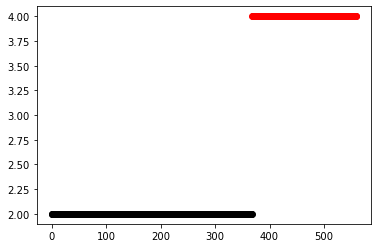

In [4]:
train_set,test_set=read_train()
distances=accuracy_calc(train_set,test_set)
plotting(distances)

# 